The verification circuit comprises 23 qubits (including input/output registers q1-q2 and auxiliary registers q3-q6) and 23 classical bits.

In [2]:
import numpy as np
from qiskit import *
from qiskit_aer import Aer
q1=QuantumRegister(4,'i_1')
q2=QuantumRegister(4,'i_2')
q3=QuantumRegister(4,'a_1')
q4=QuantumRegister(4,'a_2')
q5=QuantumRegister(4,'a_3')
q6=QuantumRegister(3,'a_4')

c1 = ClassicalRegister(4)
c2 = ClassicalRegister(4)
c3 = ClassicalRegister(4)
c4 = ClassicalRegister(4)
c5 = ClassicalRegister(4)
c6 = ClassicalRegister(3)

Circuits of linear layers $\Phi$ and $B\Phi^{-1}()\oplus c$ :


In [4]:
qc=QuantumCircuit(q1,q2)
def Phi(q1,q2):
        qc.cx(q1[2],q1[0])
        qc.cx(q2[1],q1[1])
        qc.cx(q2[3],q1[1])
        qc.cx(q1[1],q2[2])
        qc.cx(q2[2],q1[2])
        qc.cx(q1[0],q1[1])
        qc.cx(q1[3],q2[2])
        qc.cx(q2[2],q2[3])
        qc.cx(q2[2],q2[1])
        qc.cx(q2[1],q2[0])

        qc.swap(q1[3],q2[2])
        qc.swap(q1[3],q1[1])
        qc.swap(q1[3],q1[0])
        qc.swap(q1[3],q2[0])
        qc.swap(q1[3],q1[2])
        qc.swap(q1[3],q2[1])
        qc.swap(q1[3],q2[3])


def B_Phi_c(q1,q2):
        qc.cx(q2[2],q1[0])
        qc.cx(q1[0],q1[2])
        qc.cx(q1[2],q1[3])
        qc.cx(q2[3],q1[0])
        qc.cx(q1[1],q1[0])
        qc.cx(q2[0],q2[3])
        qc.cx(q2[1],q2[0])
        qc.cx(q2[0],q1[1])
        qc.cx(q2[3],q2[2])
        qc.cx(q2[2],q2[1])
        qc.cx(q1[3],q2[1])
        qc.cx(q1[1],q1[2])
        qc.cx(q2[1],q2[3])
        qc.cx(q2[3],q1[1])

        qc.swap(q1[3],q2[0])
        qc.swap(q1[3],q1[1])
        qc.swap(q1[3],q2[3])
        qc.swap(q1[3],q1[0])
        qc.swap(q1[2],q2[2])

        qc.x(q2[2])
        qc.x(q2[1])
        qc.x(q1[1])
        qc.x(q1[0])

Circuits for $\theta$ and $\theta^\dagger$ :

In [6]:
qc=QuantumCircuit(q1,q2,q3,q4,q5,q6)
def theta(q1,q2,q3,q4):
    qc.cx(q1[3],q4[0])
    qc.cx(q2[3],q4[1])

    qc.cx(q1[2],q1[3])
    qc.cx(q1[2],q1[0])
    qc.cx(q2[2],q2[3])
    qc.cx(q2[2],q2[0])

    qc.barrier(q1,q2,q3,q4,q5,q6)

    qc.ccx(q1[0],q2[0],q3[2])
    qc.ccx(q1[1],q2[1],q3[3])
    qc.ccx(q1[2],q2[2],q3[0])
    qc.ccx(q1[3],q2[3],q3[1])
    qc.ccx(q4[0],q4[1],q4[2])

    qc.barrier(q1,q2,q3,q4,q5,q6)

    qc.cx(q1[2],q1[0])
    qc.cx(q1[2],q1[3])
    qc.cx(q2[2],q2[0])
    qc.cx(q2[2],q2[3])
    qc.cx(q3[0],q3[2])
    qc.cx(q3[1],q3[2])
    qc.cx(q3[3],q3[0])
    qc.cx(q3[2],q3[3])
    qc.cx(q3[0],q3[2])

    qc.cx(q4[2],q3[0])

    qc.cx(q1[3],q1[2])
    qc.cx(q1[1],q1[3])
    qc.cx(q1[0],q1[1])
    qc.cx(q1[1],q1[2])
    qc.cx(q2[3],q2[2])
    qc.cx(q2[1],q2[3])
    qc.cx(q2[0],q2[1])
    qc.cx(q2[1],q2[2])
    qc.cx(q3[1],q3[3])
    qc.cx(q3[0],q3[1])
    qc.cx(q3[2],q3[0])

    qc.barrier(q1,q2,q3,q4,q5,q6)

    qc.ccx(q1[0],q2[0],q3[2])
    qc.ccx(q1[1],q2[1],q3[1])
    qc.ccx(q1[2],q2[2],q3[3])
    qc.ccx(q1[3],q2[3],q3[0])
    qc.ccx(q4[0],q4[1],q4[2])

    qc.barrier(q1,q2,q3,q4,q5,q6)

    qc.cx(q1[1],q1[2])
    qc.cx(q1[0],q1[1])
    qc.cx(q1[1],q1[3])
    qc.cx(q1[3],q1[2])
    qc.cx(q2[1],q2[2])
    qc.cx(q2[0],q2[1])
    qc.cx(q2[1],q2[3])
    qc.cx(q2[3],q2[2])
    qc.cx(q3[2],q3[0])
    qc.cx(q3[0],q3[1])
    qc.cx(q3[1],q3[3])

    qc.cx(q1[3],q4[0])
    qc.cx(q2[3],q4[1])


    qc.cx(q1[0],q2[0])
    qc.cx(q1[1],q2[1])
    qc.cx(q1[2],q2[2])
    qc.cx(q1[3],q2[3])
    qc.cx(q2[3],q2[2])
    qc.cx(q2[0],q2[3])
    qc.cx(q2[2],q2[1])
    qc.cx(q2[1],q2[0])
    qc.swap(q2[1],q2[0])
    qc.swap(q2[1],q2[2])
    qc.cx(q2[0],q3[0])
    qc.cx(q2[1],q3[1])
    qc.cx(q2[2],q3[2])
    qc.cx(q2[3],q3[3])
    qc.swap(q2[1],q2[2])
    qc.swap(q2[1],q2[0])
    qc.cx(q2[1],q2[0])
    qc.cx(q2[2],q2[1])
    qc.cx(q2[0],q2[3])
    qc.cx(q2[3],q2[2])
    qc.cx(q1[0],q2[0])
    qc.cx(q1[1],q2[1])
    qc.cx(q1[2],q2[2])
    qc.cx(q1[3],q2[3])

def theta_dagger(q1,q2,q3,q4):
    qc.cx(q1[0],q2[0])
    qc.cx(q1[1],q2[1])
    qc.cx(q1[2],q2[2])
    qc.cx(q1[3],q2[3])
    qc.cx(q2[3],q2[2])
    qc.cx(q2[0],q2[3])
    qc.cx(q2[2],q2[1])
    qc.cx(q2[1],q2[0])
    qc.swap(q2[1],q2[0])
    qc.swap(q2[1],q2[2])
    qc.cx(q2[0],q3[0])
    qc.cx(q2[1],q3[1])
    qc.cx(q2[2],q3[2])
    qc.cx(q2[3],q3[3])
    qc.swap(q2[1],q2[2])
    qc.swap(q2[1],q2[0])
    qc.cx(q2[1],q2[0])
    qc.cx(q2[2],q2[1])
    qc.cx(q2[0],q2[3])
    qc.cx(q2[3],q2[2])
    qc.cx(q1[0],q2[0])
    qc.cx(q1[1],q2[1])
    qc.cx(q1[2],q2[2])
    qc.cx(q1[3],q2[3])

    qc.cx(q1[3],q4[0])
    qc.cx(q2[3],q4[1])

    qc.cx(q3[1],q3[3])
    qc.cx(q3[0],q3[1])
    qc.cx(q3[2],q3[0])
    qc.cx(q2[3],q2[2])
    qc.cx(q2[1],q2[3])
    qc.cx(q2[0],q2[1])
    qc.cx(q2[1],q2[2])
    qc.cx(q1[3],q1[2])
    qc.cx(q1[1],q1[3])
    qc.cx(q1[0],q1[1])
    qc.cx(q1[1],q1[2])

    qc.barrier(q1,q2,q3,q4,q5,q6)

    qc.ccx(q1[0],q2[0],q3[2])
    qc.ccx(q1[1],q2[1],q3[1])
    qc.ccx(q1[2],q2[2],q3[3])
    qc.ccx(q1[3],q2[3],q3[0])
    qc.ccx(q4[0],q4[1],q4[2])

    qc.barrier(q1,q2,q3,q4,q5,q6)

    qc.cx(q2[1],q2[2])
    qc.cx(q2[0],q2[1])
    qc.cx(q2[1],q2[3])
    qc.cx(q2[3],q2[2])
    qc.cx(q1[1],q1[2])
    qc.cx(q1[0],q1[1])
    qc.cx(q1[1],q1[3])
    qc.cx(q1[3],q1[2])
    qc.cx(q3[2],q3[0])
    qc.cx(q3[0],q3[1])
    qc.cx(q3[1],q3[3])

    qc.cx(q4[2],q3[0])

    qc.cx(q3[0],q3[2])
    qc.cx(q3[2],q3[3])
    qc.cx(q3[3],q3[0])
    qc.cx(q3[1],q3[2])
    qc.cx(q3[0],q3[2])
    qc.cx(q2[2],q2[3])
    qc.cx(q2[2],q2[0])
    qc.cx(q1[2],q1[3])
    qc.cx(q1[2],q1[0])

    qc.barrier(q1,q2,q3,q4,q5,q6)

    qc.ccx(q1[0],q2[0],q3[2])
    qc.ccx(q1[1],q2[1],q3[3])
    qc.ccx(q1[2],q2[2],q3[0])
    qc.ccx(q1[3],q2[3],q3[1])
    qc.ccx(q4[0],q4[1],q4[2])

    qc.barrier(q1,q2,q3,q4,q5,q6)

    qc.cx(q2[2],q2[0])
    qc.cx(q2[2],q2[3])
    qc.cx(q1[2],q1[0])
    qc.cx(q1[2],q1[3])

    qc.cx(q1[3],q4[0])
    qc.cx(q2[3],q4[1])

circuits for $inv_1$ and $inv_1^\dagger$ :

In [8]:
qc=QuantumCircuit(q1,q2,q3,q4,q5,q6)
def inv_1(q1,q2,q3,q4):
    qc.swap(q1[1],q1[3])
    qc.swap(q1[0],q1[1])
    qc.cx(q1[1],q1[0])
    qc.cx(q1[2],q1[0])
    qc.cx(q1[0],q1[3])
    qc.cx(q1[3],q1[2])

    qc.cx(q1[0],q3[0])
    qc.cx(q1[2],q3[1])
    
    qc.barrier(q1,q2,q3,q4,q5,q6)
    qc.ccx(q1[0],q1[2],q3[2])
    qc.ccx(q1[3],q3[0],q3[3])
    qc.ccx(q1[1],q3[1],q4[0])
    qc.barrier(q1,q2,q3,q4,q5,q6)
    
    qc.cx(q1[1],q1[0])
    qc.cx(q1[3],q1[2])
    qc.cx(q1[1],q3[0])
    qc.cx(q3[2],q4[1])
    qc.cx(q1[3],q3[1])
    qc.cx(q1[1],q3[2])
    qc.cx(q1[3],q4[1])
    
    qc.barrier(q1,q2,q3,q4,q5,q6)
    qc.ccx(q1[2],q4[0],q2[0])
    qc.ccx(q3[1],q3[2],q2[1])
    qc.ccx(q1[0],q3[3],q2[2])
    qc.ccx(q3[0],q4[1],q2[3])
    qc.barrier(q1,q2,q3,q4,q5,q6)
    
    qc.cx(q1[2],q2[0])
    qc.cx(q1[0],q2[2])
    qc.cx(q1[1],q3[2])
    qc.cx(q1[1],q1[0])
    qc.cx(q1[3],q1[2])
    qc.cx(q3[2],q2[0])
    qc.cx(q1[3],q2[1])
    qc.cx(q3[2],q2[2])
    qc.cx(q1[1],q2[3])
    qc.cx(q1[3],q4[1])
    qc.cx(q1[3],q3[1])
    qc.cx(q3[2],q4[1])
    qc.cx(q1[1],q3[0])

    qc.barrier(q1,q2,q3,q4,q5,q6)
    qc.ccx(q1[0],q1[2],q3[2])
    qc.ccx(q1[3],q3[0],q3[3])
    qc.ccx(q1[1],q3[1],q4[0])
    qc.barrier(q1,q2,q3,q4,q5,q6)
    
    qc.cx(q1[0],q3[0])
    qc.cx(q1[2],q3[1])

    qc.cx(q1[3],q1[2])
    qc.cx(q1[0],q1[3])
    qc.cx(q1[2],q1[0])
    qc.cx(q1[1],q1[0])
    qc.swap(q1[0],q1[1])
    qc.swap(q1[1],q1[3])

    qc.cx(q2[3],q2[2])
    qc.cx(q2[0],q2[3])
    qc.cx(q2[2],q2[0])
    qc.cx(q2[1],q2[0])
    qc.swap(q2[0],q2[1])
    qc.swap(q2[1],q2[3])

def inv_1_dagger(q1,q2,q3,q4):
    qc.swap(q2[1], q2[3])
    qc.swap(q2[0], q2[1])
    qc.cx(q2[1], q2[0])
    qc.cx(q2[2], q2[0])
    qc.cx(q2[0], q2[3])
    qc.cx(q2[3], q2[2])

    qc.swap(q1[1], q1[3])
    qc.swap(q1[0], q1[1])
    qc.cx(q1[1], q1[0])
    qc.cx(q1[2], q1[0])
    qc.cx(q1[0], q1[3])
    qc.cx(q1[3], q1[2])

    qc.cx(q1[2],q3[1])
    qc.cx(q1[0],q3[0])

    qc.barrier(q1,q2,q3,q4,q5,q6)
    qc.ccx(q1[1],q3[1],q4[0])
    qc.ccx(q1[3],q3[0],q3[3])
    qc.ccx(q1[0],q1[2],q3[2])
    qc.barrier(q1,q2,q3,q4,q5,q6)
    
    qc.cx(q1[1],q3[0])
    qc.cx(q3[2],q4[1])
    qc.cx(q1[3],q3[1])
    qc.cx(q1[3],q4[1])
    qc.cx(q1[1],q2[3])
    qc.cx(q3[2],q2[2])
    qc.cx(q1[3],q2[1])
    qc.cx(q3[2],q2[0])
    qc.cx(q1[3],q1[2])
    qc.cx(q1[1],q1[0])
    qc.cx(q1[1],q3[2])
    qc.cx(q1[0],q2[2])
    qc.cx(q1[2],q2[0])

    qc.barrier(q1,q2,q3,q4,q5,q6)
    qc.ccx(q3[0],q4[1],q2[3])
    qc.ccx(q1[0],q3[3],q2[2])
    qc.ccx(q3[1],q3[2],q2[1])
    qc.ccx(q1[2],q4[0],q2[0])
    qc.barrier(q1,q2,q3,q4,q5,q6)
    
    qc.cx(q1[3],q4[1])
    qc.cx(q1[1],q3[2])
    qc.cx(q1[3],q3[1])
    qc.cx(q3[2],q4[1])
    qc.cx(q1[1],q3[0])
    qc.cx(q1[3],q1[2])
    qc.cx(q1[1],q1[0])

    qc.barrier(q1,q2,q3,q4,q5,q6)
    qc.ccx(q1[1],q3[1],q4[0])
    qc.ccx(q1[3],q3[0],q3[3])
    qc.ccx(q1[0],q1[2],q3[2])
    qc.barrier(q1,q2,q3,q4,q5,q6)
    
    qc.cx(q1[2],q3[1])
    qc.cx(q1[0],q3[0])

    qc.cx(q1[3],q1[2])
    qc.cx(q1[0],q1[3])
    qc.cx(q1[2],q1[0])
    qc.cx(q1[1],q1[0])
    qc.swap(q1[0],q1[1])
    qc.swap(q1[1],q1[3])

circuits for $\mathfrak{C}^0$-$mul$ and $\mathfrak{C}^0$-$mul^\dagger$ :

In [10]:
qc=QuantumCircuit(q1,q2,q3,q4,q5,q6)
def C0_mul(q1,q2,q3,q4):
    qc.cx(q1[3],q4[0])
    qc.cx(q2[3],q4[1])

    qc.cx(q1[2],q1[3])
    qc.cx(q1[2],q1[0])
    qc.cx(q2[2],q2[3])
    qc.cx(q2[2],q2[0])

    qc.barrier(q1,q2,q3,q4,q5,q6)
    qc.ccx(q1[0],q2[0],q3[2])
    qc.ccx(q1[1],q2[1],q3[3])
    qc.ccx(q1[2],q2[2],q3[0])
    qc.ccx(q1[3],q2[3],q3[1])
    qc.ccx(q4[0],q4[1],q4[2])
    qc.barrier(q1,q2,q3,q4,q5,q6)

    qc.cx(q1[2],q1[0])
    qc.cx(q1[2],q1[3])
    qc.cx(q2[2],q2[0])
    qc.cx(q2[2],q2[3])
    qc.cx(q3[0],q3[2])
    qc.cx(q3[1],q3[2])
    qc.cx(q3[3],q3[0])
    qc.cx(q3[2],q3[3])
    qc.cx(q3[0],q3[2])

    qc.cx(q4[2],q3[0])

    qc.cx(q1[3],q1[2])
    qc.cx(q1[1],q1[3])
    qc.cx(q1[0],q1[1])
    qc.cx(q1[1],q1[2])
    qc.cx(q2[3],q2[2])
    qc.cx(q2[1],q2[3])
    qc.cx(q2[0],q2[1])
    qc.cx(q2[1],q2[2])
    qc.cx(q3[1],q3[3])
    qc.cx(q3[0],q3[1])
    qc.cx(q3[2],q3[0])

    qc.barrier(q1,q2,q3,q4,q5,q6)
    qc.ccx(q1[0],q2[0],q3[2])
    qc.ccx(q1[1],q2[1],q3[1])
    qc.ccx(q1[2],q2[2],q3[3])
    qc.ccx(q1[3],q2[3],q3[0])
    qc.ccx(q4[0],q4[1],q4[2])
    qc.barrier(q1,q2,q3,q4,q5,q6)
    
    qc.cx(q1[1],q1[2])
    qc.cx(q1[0],q1[1])
    qc.cx(q1[1],q1[3])
    qc.cx(q1[3],q1[2])
    qc.cx(q2[1],q2[2])
    qc.cx(q2[0],q2[1])
    qc.cx(q2[1],q2[3])
    qc.cx(q2[3],q2[2])
    qc.cx(q3[2],q3[0])
    qc.cx(q3[0],q3[1])
    qc.cx(q3[1],q3[3])

    qc.cx(q1[3],q4[0])
    qc.cx(q2[3],q4[1])

def C0_mul_dagger(q1,q2,q3,q4):
    qc.cx(q1[3],q4[0])
    qc.cx(q2[3],q4[1])

    qc.cx(q3[1],q3[3])
    qc.cx(q3[0],q3[1])
    qc.cx(q3[2],q3[0])
    qc.cx(q2[3],q2[2])
    qc.cx(q2[1],q2[3])
    qc.cx(q2[0],q2[1])
    qc.cx(q2[1],q2[2])
    qc.cx(q1[3],q1[2])
    qc.cx(q1[1],q1[3])
    qc.cx(q1[0],q1[1])
    qc.cx(q1[1],q1[2])

    qc.barrier(q1,q2,q3,q4,q5,q6)
    qc.ccx(q1[0],q2[0],q3[2])
    qc.ccx(q1[1],q2[1],q3[1])
    qc.ccx(q1[2],q2[2],q3[3])
    qc.ccx(q1[3],q2[3],q3[0])
    qc.ccx(q4[0],q4[1],q4[2])
    qc.barrier(q1,q2,q3,q4,q5,q6)

    qc.cx(q2[1],q2[2])
    qc.cx(q2[0],q2[1])
    qc.cx(q2[1],q2[3])
    qc.cx(q2[3],q2[2])
    qc.cx(q1[1],q1[2])
    qc.cx(q1[0],q1[1])
    qc.cx(q1[1],q1[3])
    qc.cx(q1[3],q1[2])
    qc.cx(q3[2],q3[0])
    qc.cx(q3[0],q3[1])
    qc.cx(q3[1],q3[3])

    qc.cx(q4[2],q3[0])

    qc.cx(q3[0],q3[2])
    qc.cx(q3[2],q3[3])
    qc.cx(q3[3],q3[0])
    qc.cx(q3[1],q3[2])
    qc.cx(q3[0],q3[2])
    qc.cx(q2[2],q2[3])
    qc.cx(q2[2],q2[0])
    qc.cx(q1[2],q1[3])
    qc.cx(q1[2],q1[0])

    qc.barrier(q1,q2,q3,q4,q5,q6)
    qc.ccx(q1[0],q2[0],q3[2])
    qc.ccx(q1[1],q2[1],q3[3])
    qc.ccx(q1[2],q2[2],q3[0])
    qc.ccx(q1[3],q2[3],q3[1])
    qc.ccx(q4[0],q4[1],q4[2])
    qc.barrier(q1,q2,q3,q4,q5,q6)

    qc.cx(q2[2],q2[0])
    qc.cx(q2[2],q2[3])
    qc.cx(q1[2],q1[0])
    qc.cx(q1[2],q1[3])

    qc.cx(q1[3],q4[0])
    qc.cx(q2[3],q4[1])

Verification of S-box quantum circuit correctness. Current input: 11110011={f3}

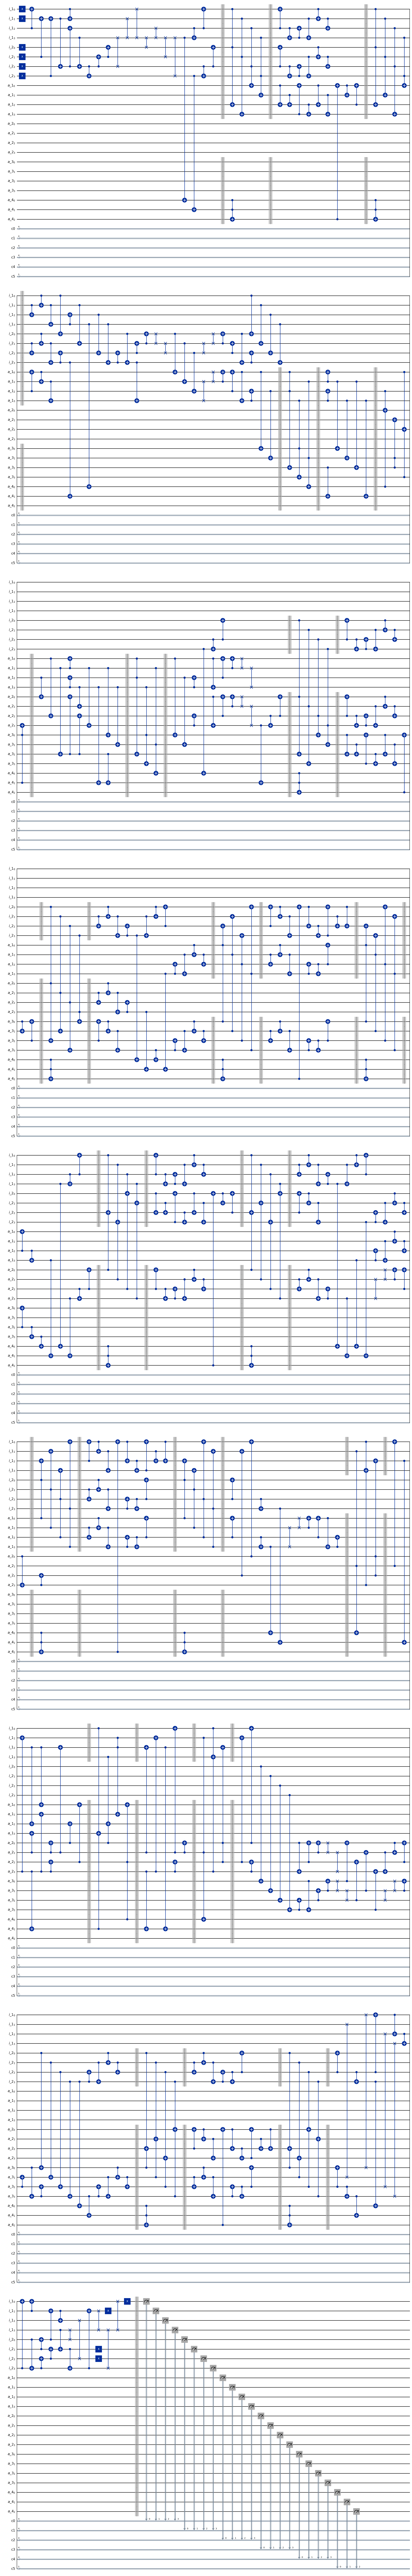

In [12]:
qc=QuantumCircuit(q1,q2,q3,q4,q5,q6,c1,c2,c3,c4,c5,c6)

#8 selectable NOT gates for controlling input
qc.x(q1[0])
qc.x(q1[1])
#qc.x(q1[2])
#qc.x(q1[3])
qc.x(q2[0])
qc.x(q2[1])
qc.x(q2[2])
qc.x(q2[3])

#Deploy components according to Figure 8
Phi(q1,q2)
theta(q1,q2,q3,q6)
inv_1(q3,q4,q5,q6)
C0_mul(q2,q4,q5,q6)
C0_mul_dagger(q5,q3,q2,q6)
C0_mul(q1,q4,q2,q6)
C0_mul_dagger(q3,q2,q1,q6)
inv_1_dagger(q4,q3,q1,q6)
theta_dagger(q2,q5,q4,q6)
qc.swap(q1[0],q5[0])
qc.swap(q1[1],q5[1])
qc.swap(q1[2],q5[2])
qc.swap(q1[3],q5[3])
B_Phi_c(q1,q2)

#Perform measurement
qc.barrier(q1,q2,q3,q4,q5,q6)
qc.measure(q1,c1)
qc.measure(q2,c2)
qc.measure(q3,c3)
qc.measure(q4,c4)
qc.measure(q5,c5)
qc.measure(q6,c6)

qc.draw('mpl',fold=41)

Measurement results obtained. The first 15 bits represent auxiliary qubit states and the last 8 bits represent the output state.

Current result: {0d} (matches substitution value in specification)

In [14]:
from qiskit_aer import Aer
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['000 0000 0000 0000 0000 1101', '000 0000 0000 0000 0000 1101', '000 0000 0000 0000 0000 1101', '000 0000 0000 0000 0000 1101', '000 0000 0000 0000 0000 1101', '000 0000 0000 0000 0000 1101', '000 0000 0000 0000 0000 1101', '000 0000 0000 0000 0000 1101', '000 0000 0000 0000 0000 1101', '000 0000 0000 0000 0000 1101']


Quantum gate count statistics (NOT gate count includes those used for S-box input generation):

In [16]:
print(qc.count_ops())

OrderedDict([('cx', 376), ('ccx', 80), ('barrier', 37), ('swap', 36), ('measure', 23), ('x', 10)])
